<a href="https://colab.research.google.com/github/pentakll4002/supportVector/blob/main/SVC_Using_(RandomizedSearchCV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Classifier Implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
## Let create synthelic data point
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2,
                           n_redundant=0)

In [4]:
X

array([[-1.04406694, -0.0569299 ],
       [ 0.58914867,  1.72377719],
       [-0.87170876, -0.46483549],
       ...,
       [ 2.19566371, -0.48681563],
       [-1.00458565,  4.4354586 ],
       [-0.95434791, -1.05491687]])

In [5]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [6]:
pd.DataFrame(X)[0]

,0
0,-1.044067
1,0.589149
2,-0.871709
3,0.602847
4,-0.105191
...,...
995,-1.058771
996,-0.958079
997,2.195664
998,-1.004586


In [7]:
pd.DataFrame(y)[0]

,0
0,0
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,0


<Axes: xlabel='0', ylabel='1'>

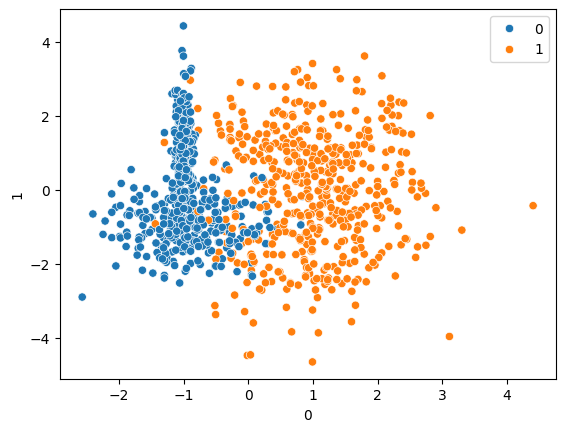

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [9]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [10]:
from sklearn.svm import SVC

In [11]:
svc = SVC(kernel='linear')

In [12]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
### Prediction
y_pred = svc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.936
[[108  10]
 [  6 126]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       118
           1       0.93      0.95      0.94       132

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250



In [15]:
print(svc.intercept_)
print(svc.coef_)

[0.6927543]
[[2.44692062 0.22369306]]


# RBF

In [16]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
### Predict
y_pred1 = rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred1)
print(acc)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
cr = classification_report(y_test, y_pred1)
print(cr)

0.952
[[110   8]
 [  4 128]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       118
           1       0.94      0.97      0.96       132

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [17]:
print(rbf.intercept_)

[0.21419355]


# Polynomial

In [18]:
polynomial = SVC(kernel='poly')
polynomial.fit(X_train, y_train)
## Predict
y_pred2 = polynomial.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
print(acc)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
cr = classification_report(y_test, y_pred2)
print(cr)

0.92
[[107  11]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       118
           1       0.92      0.93      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [19]:
print(polynomial.intercept_)

[0.1549588]


#Sigmoid

In [20]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
## Predict
y_pred3 = sigmoid.predict(X_test)
acc = accuracy_score(y_test, y_pred3)
print(acc)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
cr = classification_report(y_test, y_pred3)
print(cr)

0.792
[[ 94  24]
 [ 28 104]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       118
           1       0.81      0.79      0.80       132

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [21]:
print(sigmoid.intercept_)

[1.27536578]


# Hyperparameter Turning with SVC (GridSearchCV)


In [22]:
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range
param_rand = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'polynomial']
}

In [23]:
random = RandomizedSearchCV(estimator=SVC(), param_distributions=param_rand, n_iter=10, cv=5,
                            verbose=3, n_jobs=-1, refit=True)

In [24]:
random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear',
                                                   'polynomial']},
                   verbose=3)

In [25]:
random.best_params_

{'kernel': 'linear', 'gamma': 0.0001, 'C': 1}

In [26]:
random.best_score_

0.9346666666666665

In [27]:
## Predict
y_pred4 = random.predict(X_test)
acc = accuracy_score(y_test, y_pred4)
print(acc)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
cr = classification_report(y_test, y_pred4)
print(cr)

0.936
[[108  10]
 [  6 126]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       118
           1       0.93      0.95      0.94       132

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250

